# Supermarket Sales Analysis: Análisis Exploratorio de Datos (EDA)

En este notebook realizaremos un análisis exploratorio de los datos (EDA) para identificar patrones, correlaciones y posibles insights. Este proceso es crucial para obtener una mejor comprensión del dataset y preparar el camino para el modelado predictivo.

---

## 1. Distribución de Ventas por Sucursal
Vamos a explorar cómo se distribuyen las ventas totales entre las diferentes sucursales del supermercado.


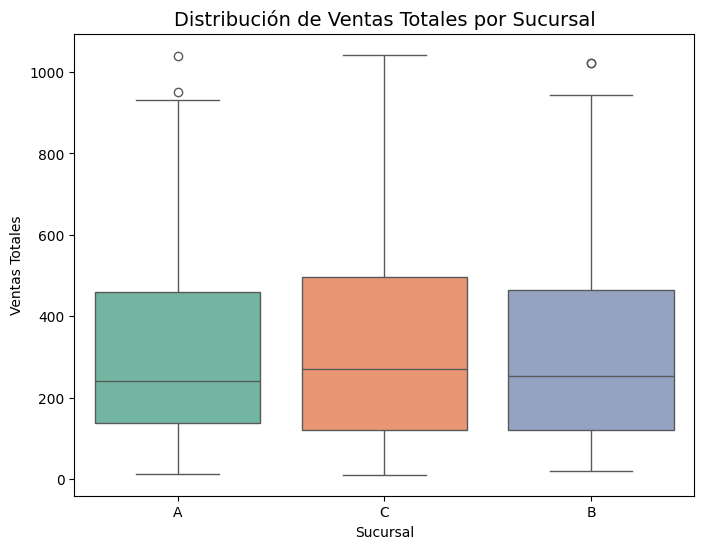

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/raw/supermarket_sales - Sheet1.csv')

# Distribución de las ventas por sucursal
plt.figure(figsize=(8,6))
sns.boxplot(x='Branch', y='Total', data=df, hue='Branch', palette="Set2", dodge=False)
plt.legend([],[], frameon=False)  # Desactivar la leyenda
plt.title('Distribución de Ventas Totales por Sucursal', fontsize=14)
plt.xlabel('Sucursal')
plt.ylabel('Ventas Totales')
plt.show()


### 2. Distribución de Ventas por Categoría de Producto
Veamos la distribución de las ventas según la categoría de productos.

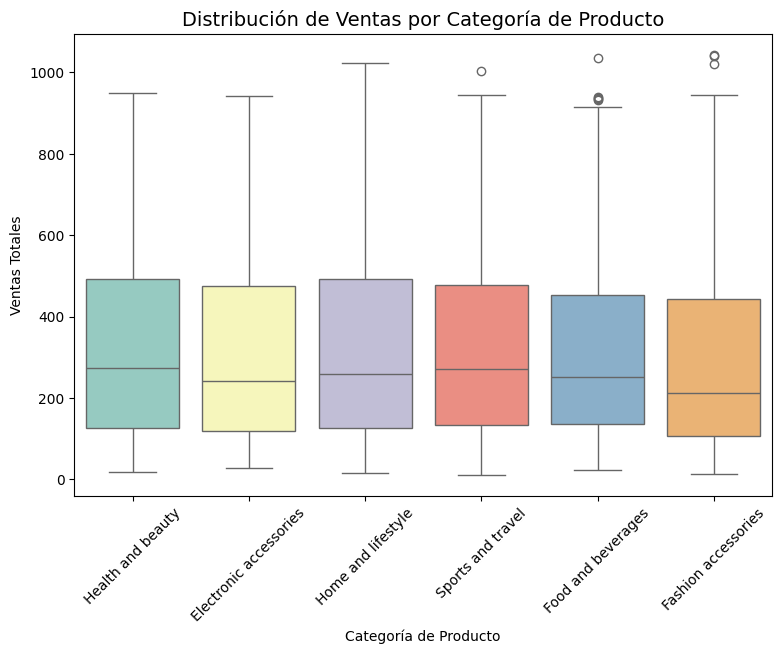

In [21]:
plt.figure(figsize=(9,6))
sns.boxplot(x='Product line', y='Total', data=df, hue='Product line', palette="Set3", dodge=False)
plt.legend([],[], frameon=False)  # Desactivar la leyenda
plt.title('Distribución de Ventas por Categoría de Producto', fontsize=14)
plt.xlabel('Categoría de Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()


### 3. Análisis de Correlaciones
Calculamos las correlaciones entre variables numéricas para identificar relaciones significativas.

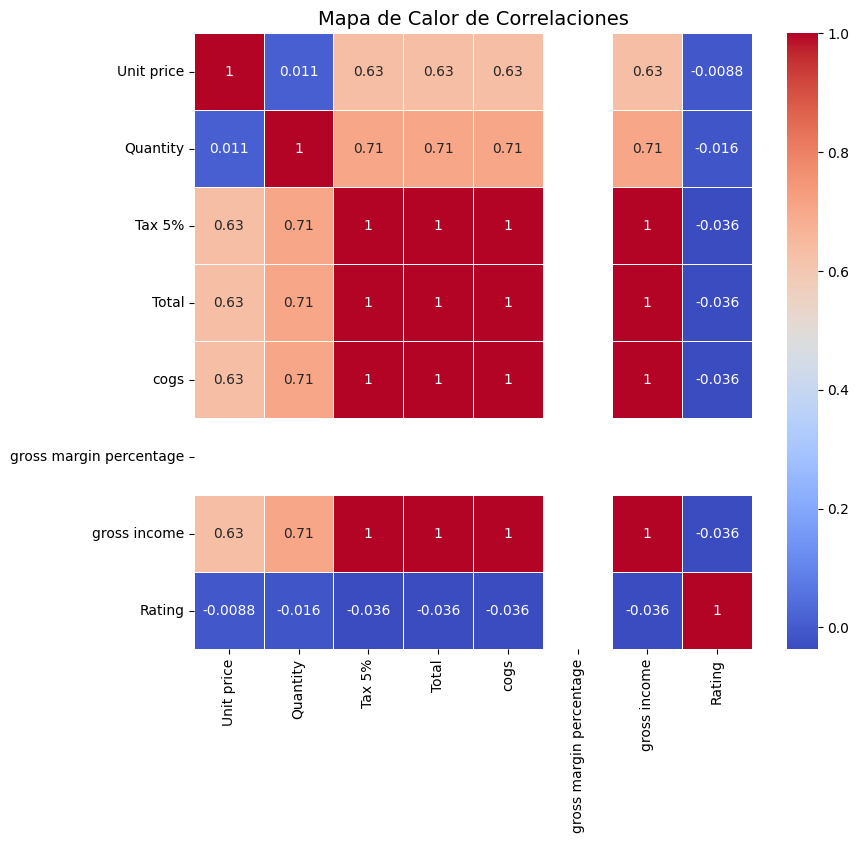

In [10]:
# Calcular la correlación entre las variables numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_columns.corr()

# Mostrar el mapa de calor de correlaciones
plt.figure(figsize=(9,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones', fontsize=14)
plt.show()


### 4. Análisis Temporal de Ventas
Exploramos cómo varían las ventas a lo largo del día.

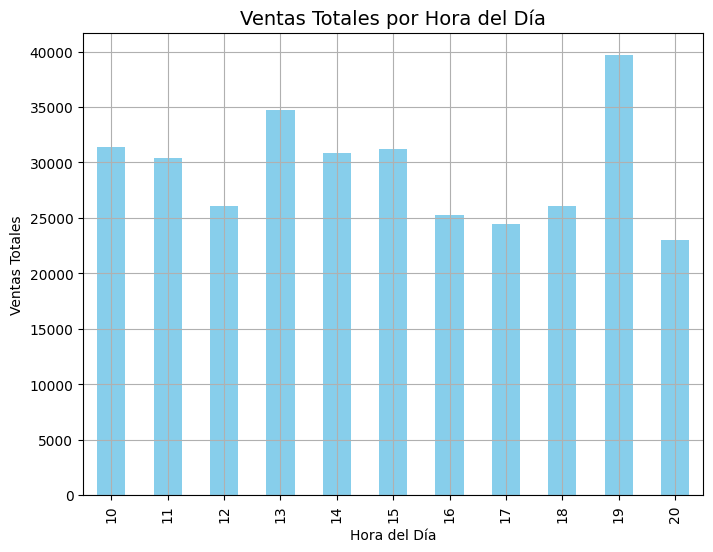

In [13]:
# Extraer la hora de la columna 'Time'
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Ventas agregadas por hora del día
sales_by_hour = df.groupby('Hour')['Total'].sum()

# Gráfico de ventas por hora del día
plt.figure(figsize=(8,6))
sales_by_hour.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Hora del Día', fontsize=14)
plt.xlabel('Hora del Día')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show()


### Conclusión
Distribución de Ventas: Las ventas se distribuyen de manera diferente según la sucursal, destacándose las sucursales A y C.
Categoría de Productos: Las categorías de productos más vendidas son Health and Beauty y Electronic Accessories.
Correlaciones: Existe una correlación fuerte entre Quantity, Unit Price y el Total de ventas, lo que indica que las cantidades de productos y el precio unitario son factores clave.
Ventas por Hora: Las horas más activas en términos de ventas son alrededor del mediodía (13:00) y al final de la tarde (19:00), lo que sugiere oportunidades para ajustar estrategias de ventas y marketing.